In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Consumo_cerveja.csv')

In [3]:
columns = ['Date','Median','Minima','Maxima','ppt','Weekend','y']

In [4]:
df.columns = columns

In [5]:
df.head()
print(df.dtypes)

Date        object
Median      object
Minima      object
Maxima      object
ppt         object
Weekend    float64
y          float64
dtype: object


In [6]:
df.isnull().sum()

Date       576
Median     576
Minima     576
Maxima     576
ppt        576
Weekend    576
y          576
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = df.drop(['Date'],1)

In [9]:
df = df.dropna()

In [10]:
df.head()

,Median,Minima,Maxima,ppt,Weekend,y
0,"27,3","23,9","32,5",0,0.0,25.461
1,"27,02","24,5","33,5",0,0.0,28.972
2,"24,82","22,4","29,9",0,1.0,30.814
3,"23,98","21,5","28,6","1,2",1.0,29.799
4,"23,82",21,"28,3",0,0.0,28.900


In [11]:
df['Weekend'] = df['Weekend'].astype('category')

In [12]:
df.dtypes

Median       object
Minima       object
Maxima       object
ppt          object
Weekend    category
y           float64
dtype: object

In [13]:
df.isnull().sum()

Median     0
Minima     0
Maxima     0
ppt        0
Weekend    0
y          0
dtype: int64

In [14]:
df['Median'] = (df['Median'].str.replace(',','.')).astype(float)
df['Minima'] = (df['Minima'].str.replace(',','.')).astype(float)
df['Maxima'] = (df['Maxima'].str.replace(',','.')).astype(float)
df['ppt'] = (df['ppt'].str.replace(',','.')).astype(float)

In [15]:
df.head()

,Median,Minima,Maxima,ppt,Weekend,y
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900


In [16]:
df.dtypes

Median      float64
Minima      float64
Maxima      float64
ppt         float64
Weekend    category
y           float64
dtype: object

In [17]:
X = df.drop(['y'],1)
y = df['y']

In [18]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 

In [19]:
dtc = DecisionTreeClassifier()
# dtc = DecisionTreeClassifier(criterion='entropy')
dtr = DecisionTreeRegressor()


In [20]:
dtr

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [21]:
param = {'criterion': ['mse','mae'],
        'max_depth' : np.arange(2,5,1),
        'max_features' : np.arange(2,5,1),
        'min_samples_split' : np.arange(0.1,0.4,0.01)}

In [22]:
param

{'criterion': ['mse', 'mae'],
 'max_depth': array([2, 3, 4]),
 'max_features': array([2, 3, 4]),
 'min_samples_split': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
        0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
        0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ])}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
dtr_cv = GridSearchCV(estimator=dtr, param_grid=param, cv = 3)

In [25]:
dtr_cv.fit(X,y)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4]),
                         'max_features': array([2, 3, 4]),
                         'min_samples_split

In [26]:
dtr_cv.best_params_

{'criterion': 'mae',
 'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 0.11}

In [27]:
ranking = dtr_cv.best_estimator_.feature_importances_

In [28]:
features = list(X)

In [29]:
feature_importance = pd.Series(dtr_cv.best_estimator_.feature_importances_, index = features)

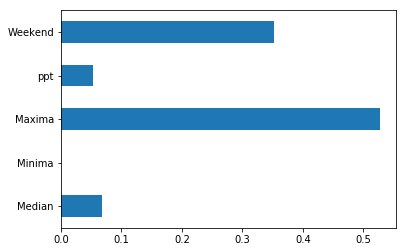

In [30]:
feature_importance.plot.barh()